In [76]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
from IPython.display import display

import seaborn as sns
sns.set_style('darkgrid')

In [77]:
# Load the dataset. If in kaggle, it will silently fall over and use the alternative path.
try:
    ds = pd.read_csv("nhis_00002.csv")
except FileNotFoundError:
    ds = pd.read_csv("/kaggle/input/nhis-00002/nhis_00002.csv")
type(ds)

pandas.core.frame.DataFrame

In [78]:
ds_len = len(ds)
print(ds_len)
ds.head()

75101


,YEAR,SERIAL,STRATA,PSU,NHISHID,PERNUM,NHISPID,HHX,SAMPWEIGHT,LONGWEIGHT,...,HEARTATTEV,LEARNDEV,RETEV,DIABETICAGE,SPEDEV,AEFFORT,ASAD,AWORTHLESS,SATISFIED,SATSCORE
0,2020,1,150,25,0002020H000002,1,0002020H00000210,H000002,5946.002,17605.50,...,1,0,0,96,0,NaN,NaN,NaN,NaN,NaN
1,2020,2,111,10,0002020H000003,1,0002020H00000310,H000003,6288.726,0.00,...,1,0,0,96,0,NaN,NaN,NaN,NaN,NaN
2,2020,3,133,3,0002020H000004,1,0002020H00000410,H000004,6083.271,0.00,...,1,0,0,96,0,NaN,NaN,NaN,NaN,NaN
3,2020,4,139,45,0002020H000007,1,0002020H00000710,H000007,11306.962,0.00,...,1,0,0,53,0,NaN,NaN,NaN,NaN,NaN
4,2020,5,130,21,0002020H000009,1,0002020H00000910,H000009,6471.818,19317.18,...,1,0,0,96,0,NaN,NaN,NaN,NaN,NaN


## Race Demographics

This dataset consists of 75,101 rows. The pie chart below displays the distribution of race demographics in the dataset.

For comparison, here are the Census Bureau estimates for the US population in 2020:

- White alone, not Hispanic or Latino: 60.1%
- Black or African American alone: 13.4%
- American Indian and Alaska Native alone: 1.0%
- Asian alone: 6.0%
- Native Hawaiian and Other Pacific Islander alone: 0.2%
- Some other race alone: 2.7%
- Two or more races: 7.8%
- Hispanic or Latino (of any race): 18.7%

Source: https://www.census.gov/quickfacts/fact/table/US/PST045222

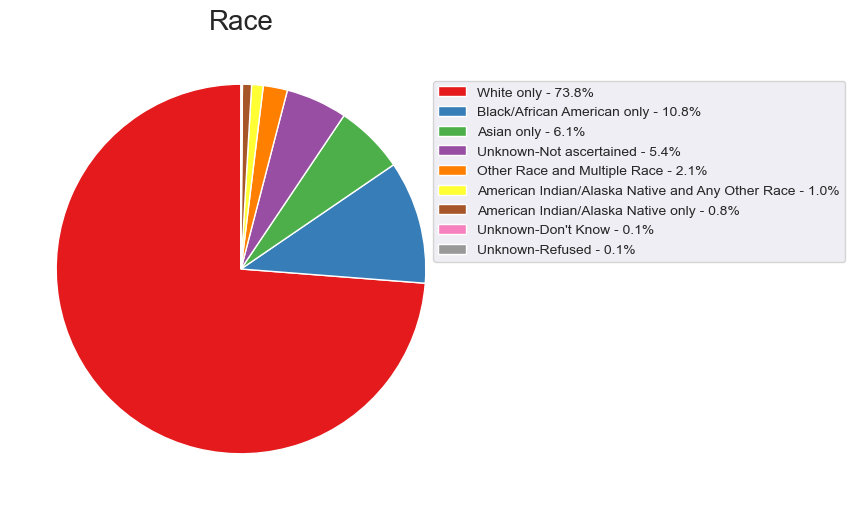

In [79]:
# Create a dictionary to map the race code to the actual race label
code_to_race = {
    100: 'White only',
    200: 'Black/African American only',
    300: 'American Indian/Alaska Native only',
    400: 'Asian only',
    510: 'Other Race and Multiple Race',
    542: 'American Indian/Alaska Native and Any Other Race',
    997: 'Unknown-Refused',
    998: 'Unknown-Not ascertained',
    999: "Unknown-Don't Know"
}

# Count the number of responses for each race code in the dataset
counts = ds['RACENEW'].value_counts()

# Create a list of the actual race labels using the dictionary
labels = [code_to_race[code] for code in counts.index]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the pie chart
ax.pie(counts, startangle=90)
ax.legend(loc="lower left", bbox_to_anchor=(0.9, 0.5), ncol=1, fontsize=10,
          labels=['{} - {:.1f}%'.format(l, c/sum(counts)*100) for l, c in zip(labels, counts)])
ax.set_title("Race", size=20)
plt.show()

## Gender Demographics

The chart below shows the gender distribution in the sample compared to the US population based on US census data.

As of 2020, the US population is estimated to be 50.8% female and 49.2% male

Total excluded rows: 10


Text(0.5, 1.0, 'Gender')

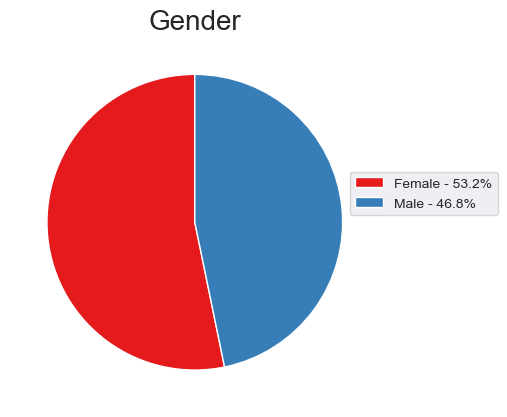

In [80]:
code_to_gender = {
    1: 'Male',
    2: 'Female',
    7: 'Unknown-refused',
    8: 'Unknown-not ascertained',
    9: "Unknown-don't know"
}

# Codes 7, 8 and 9 represents a total of 10 values, and is too miniscule to carry a percentage.
filtered_ds = ds.loc[ds['SEX'].isin([1, 2])]
counts = filtered_ds['SEX'].value_counts()
total_counts = counts.sum()
print (f"Total excluded rows: {ds_len - total_counts}")
labels = [code_to_gender[code] for code in counts.index]
plt.pie(counts, startangle=90, autopct='')
plt.legend(loc="lower left", bbox_to_anchor=(0.9, 0.5), ncol=1, fontsize=10, 
           labels=['{} - {:.1f}%'.format(l, c/sum(counts)*100) for l, c in zip(labels, counts)])
plt.title("Gender", size=20)


### Family Income

24.0    12027
11.0     9136
22.0     6699
23.0     4855
12.0     4641
Name: INCFAM07ON, dtype: int64


Text(0.5, 1.0, 'Family Income')

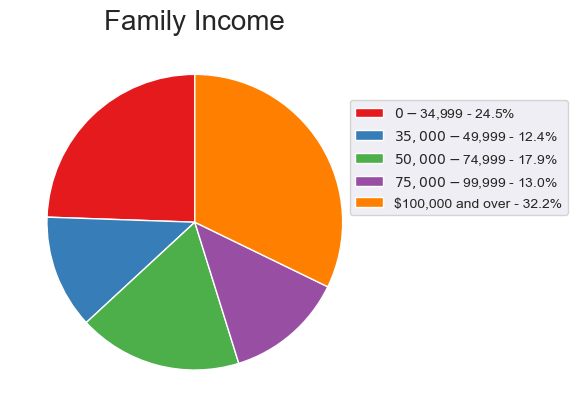

In [81]:
# Define a dictionary that maps income codes to income ranges
code_to_income = {
    11: '$0 - $34,999',
    12: '$35,000 - $49,999',
    22: '$50,000 - $74,999',
    23: '$75,000 - $99,999',
    24: '$100,000 and over'
}

# Get the counts for each income code in the dataset
counts = ds['INCFAM07ON'].value_counts()
print(counts)

# Get the labels for each income code
labels = [code_to_income[code] for code in counts.index]

# Sort the counts and labels in order of the income ranges
counts, labels = zip(*sorted(zip(counts, labels), key=lambda x: list(code_to_income.values()).index(x[1])))

# Create the pie chart
plt.pie(counts, startangle=90, autopct='')
plt.legend(loc="lower left", bbox_to_anchor=(0.9, 0.5), ncol=1, fontsize=10,
           labels=['{} - {:.1f}%'.format(l, c/sum(counts)*100) for l, c in zip(labels, counts) if c != 0])
plt.title("Family Income", size=20)


By calculating the prevalence, we can determine if certain groups are overrepresented or underrepresented, which can help inform the development of fair machine learning models. For example, if a particular group is underrepresented in the dataset, it may be necessary to collect additional data or use techniques such as data augmentation to ensure that the machine learning model is able to make accurate predictions for that group. Similarly, if a particular group is overrepresented in the dataset, it may be necessary to adjust the weights assigned to different groups during training to prevent the model from being biased towards that group.

In [82]:
# Create a new dataframe with only the necessary columns
ds_fair = ds[['RACENEW', 'INCFAM07ON']]

# Rename the columns for clarity
ds_fair = ds_fair.rename(columns={'RACENEW': 'race', 'INCFAM07ON': 'income'})

# Define privileged race and income. 100 is white, 24 is 100k+
privileged_race = 100
privileged_income = [24]

In [83]:
# Create the privileged variables
ds_fair['priv_race'] = ds_fair['race'].apply(lambda x: 1 if x == privileged_race else 0)
ds_fair['priv_income'] = ds_fair['income'].apply(lambda x: 1 if x in privileged_income else 0)
display(ds_fair[:15])

# Calculating the prevalence

# Calculate the total number of individuals in the dataset (We already know it's 75,101)
total = len(ds_fair)

ds_fair['priv_count'] = ds_fair['priv_race'] + ds_fair['priv_income']
privileged = len(ds_fair[ds_fair['priv_count'] == 2])

prevalence = privileged / total
print(prevalence)

,race,income,priv_race,priv_income
0,100,11.0,1,0
1,100,24.0,1,1
2,100,24.0,1,1
3,100,22.0,1,0
4,100,23.0,1,0
5,100,24.0,1,1
6,100,23.0,1,0
7,542,24.0,0,1
8,100,12.0,1,0
9,200,11.0,0,0


0.12973196095924155
